<a href="https://colab.research.google.com/github/ubsuny/MLFringe-Contrast-CP2P2024/blob/main/two_slit_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

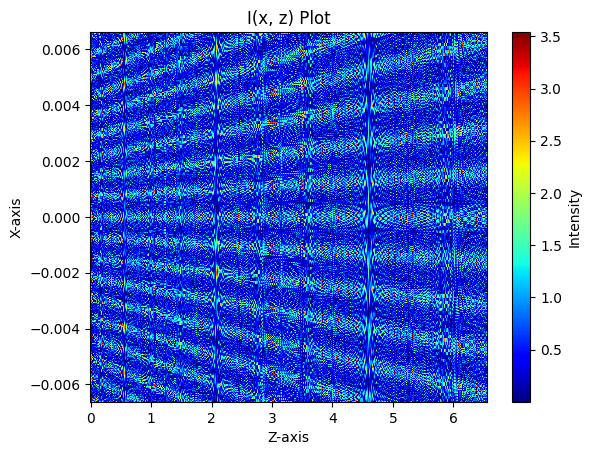

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pi = np.pi
p_G = 2.4E-6
L_1 = 3
L_2 = 2.5  # Fix z to L_2
d = 0.01
L=L_1+d+L_2
C1 = np.cos(pi / 4)
C2 = np.cos(pi / 4)
S1 = np.sin(pi / 4)
S2 = np.sin(pi / 4)
M1 = 1 + d / L_1
lam = 4.4E-10

# Some equations def.
k_G = 2 * pi / p_G
K_0 = 2 * pi / lam
x_1 = 0
x_2 = 0

P_M = L * p_G / d
Z_TM = (2 * p_G**2 * L_2 * (d + L_1)) / (lam * d * (d + 2 * L_1))

# Range for z and x
x_values = np.linspace(-5*P_M, 5*P_M, 1000)  # Considering micrometers
z_values = np.linspace(0, 2*Z_TM,1000)  # Considering meters

# Initialize the intensity array
intensity_values = np.zeros((len(z_values), len(x_values)))

# Calculate the intensity for each combination of z and x
for i, z in enumerate(z_values):
    M2 = 1 + z / (L_1 + L_2)
    for j, x in enumerate(x_values):
        sum1 = sum(
            2 / (pi * n) * np.exp(1j * n * k_G * (x / M2 - x_2)) * np.exp(-1j * (n**2 * k_G**2 * z) / (2 * K_0 * M2))
            for n in [-1, 1]
        )
        sum2 = sum(
            2 / (pi * m) * np.exp(1j * m**2 * k_G**2 * d) / (2 * K_0 * M1)
            * np.exp(1j * m * k_G * x / (M1 * M2))
            * np.exp((-1j * m**2 * k_G**2 * z) / (2 * K_0 * M1**2 * M2**2))
            for m in [-1, 1]
                          )
        sum3 = sum(
            4 / (pi**2 * m * n) * np.exp((1j * m**2 * k_G**2 * d) / (2 * K_0 * M1))
            * np.exp(-1j * n * k_G * x_2)
            * np.exp(1j * ((m * k_G / M1) + (n * k_G)) * (x /M2))
            * np.exp((-1j * (m / M1 + n)**2 * k_G**2 * z) / (2 * M2 * K_0))
            for m in [-1, 1]
            for n in [-1, 1]
        )
        # Calculate the intensity for the given z and x
        intensity_values[j, i] = np.abs((C1 * C2) + (C1 * S2) * sum1 + (S1 * C2) * sum2 + (S1 * S2) * sum3)**2

# Create a 2D plot
plt.pcolormesh(z_values, x_values, intensity_values, cmap='jet')
plt.xlabel('Z-axis')
plt.ylabel('X-axis')
plt.title('I(x, z) Plot')
plt.colorbar(label='Intensity')
plt.show()


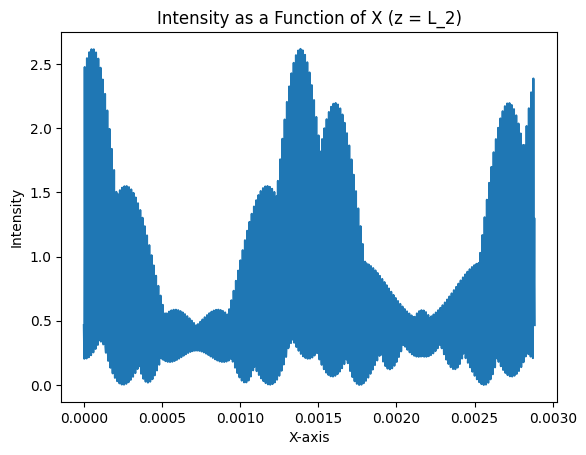

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pi = np.pi
p_G = 2.4E-6
L_1 = 3
L_2 = 3  # Fix z to L_2
d = 0.01
L=L_1+d+L_2
C1 = np.cos(pi / 4)
C2 = np.cos(pi / 4)
S1 = np.sin(pi / 4)
S2 = np.sin(pi / 4)
M1 = 1 + d / L_1
lam = 4.4E-10

# Some equations def.
k_G = 2 * pi / p_G
K_0 = 2 * pi / lam
x_1 = 0
x_2 = 0

P_M = L * p_G / d
Z_TM = (2 * p_G**2 * L_2 * (d + L_1)) / (lam * d * (d + 2 * L_1))

# Range for x
x_values = np.linspace(0, 2*P_M, 1000)  # Considering micrometers

# Initialize a 1D intensity array
intensity_values = np.zeros_like(x_values)

# Calculate intensity for each x value (z fixed at L_2)
for j, x in enumerate(x_values):
    M2 = 1 + L_2 / (L_1 + d)  # Calculate M2 with z = L_2

    sum1 = sum(
        2 / (pi * n) * np.exp(1j * n * k_G * (x / M2 - x_2)) * np.exp(-1j * (n**2 * k_G**2 * L_2) / (2 * K_0 * M2))
        for n in [-1, 1]
    )
    sum2 = sum(
        2 / (pi * m) * np.exp(1j * m**2 * k_G**2 * d) / (2 * K_0 * M1)
        * np.exp(1j * m * k_G * x / (M1 * M2))
        * np.exp((-1j * m**2 * k_G**2 * L_2) / (2 * K_0 * M1**2 * M2**2))
        for m in [-1, 1]
    )
    sum3 = sum(
        4 / (pi**2 * m * n) * np.exp((1j * m**2 * k_G**2 * d) / (2 * K_0 * M1))
        * np.exp(-1j * n * k_G * x_2)
        * np.exp(1j * ((m * k_G / M1) + (n * k_G)) * (x / M2))
        * np.exp((-1j * (m / M1 + n)**2 * k_G**2 * L_2) / (2 * M2 * K_0))
        for m in [-1, 1]
        for n in [-1, 1]
    )

    # Calculate intensity for the given x value
    intensity_values[j] = np.abs((C1 * C2) + (C1 * S2) * sum1 + (S1 * C2) * sum2 + (S1 * S2) * sum3)**2

# Plot intensity vs. x
plt.plot(x_values, intensity_values)
plt.xlabel('X-axis')
plt.ylabel('Intensity')
plt.title('Intensity as a Function of X (z = L_2)')
plt.show()


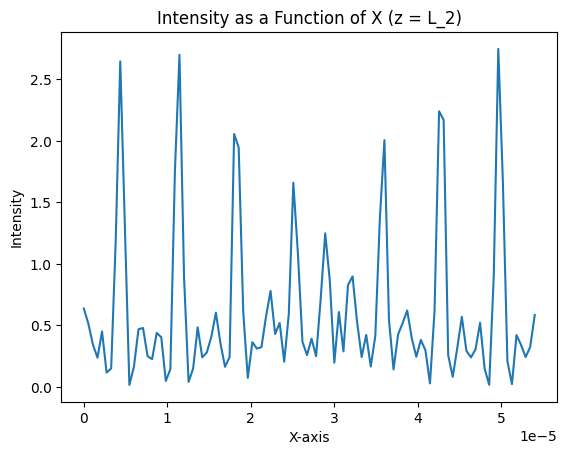

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pi = np.pi
p_G = 2.4E-6
L_1 = 3
L_2 = 2.5  # Fix z to L_2 conceptually
C1 = np.cos(pi / 4)
C2 = np.cos(pi / 4)
S1 = np.sin(pi / 4)
S2 = np.sin(pi / 4)
M1 = 1 + L_2 / L_1
lam = 4.4E-10

# Some equations def.
k_G = 2 * pi / p_G
K_0 = 2 * pi / lam
x_1 = p_G / 2
x_2 = p_G / 2
d = 0.01
P_M = L_2 * p_G / d
Z_TM = (2 * p_G**2 * L_2 * (d + L_1)) / (lam * d * (d + 2 * L_1))

# Range for x
x_values = np.linspace(0, 0.09*P_M, 100)  # Considering micrometers

# Initialize a 1D intensity array
intensity_values = np.zeros_like(x_values)

# Set z to L_2 before loops (conceptually fixing z)
z = L_2

# Calculate intensity for each x value
for j, x in enumerate(x_values):
    M2 = 1 + z / (L_1 + L_2)  # Keep z in the equation

    sum1 = sum(
        2 / (pi * n) * np.exp(1j * n * k_G * (x / M2 - x_2)) * np.exp(-1j * (n**2 * k_G**2 * z) / (2 * K_0 * M2))
        for n in [-1, 1]
    )
    sum2 = sum(
        2 / (pi * m) * np.exp(1j * m**2 * k_G**2 * d) / (2 * K_0 * M1)
        * np.exp(1j * m * k_G * x / (M1 * M2))
        * np.exp((-1j * m**2 * k_G**2 * z) / (2 * K_0 * M1**2 * M2**2))
        for m in [-1, 1]
    )
    sum3 = sum(
        4 / (pi**2 * m * n) * np.exp((1j * m**2 * k_G**2 * d) / (2 * K_0 * M1))
        * np.exp(-1j * n * k_G * x_2)
        * np.exp(1j * ((m * k_G / M1) + (n * k_G)) * (x / M2))
        * np.exp((-1j * (m / M1 + n)**2 * k_G**2 * z) / (2 * M2 * K_0))
        for m in [-1, 1]
        for n in [-1, 1]
    )

    # Calculate intensity for the given x value
    intensity_values[j] = np.abs((C1 * C2) + (C1 * S2) * sum1 + (S1 * C2) * sum2 + (S1 * S2) * sum3)**2

# Plot intensity vs. x
plt.plot(x_values, intensity_values)
plt.xlabel('X-axis')
plt.ylabel('Intensity')
plt.title('Intensity as a Function of X (z = L_2)')
plt.show()
